<a href="https://colab.research.google.com/github/Jholman22/VISION_x_COMPUTADOR/blob/main/Copia_de_GREEN_MACHINE_APP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GREEN MACHINE  
Green Machine es un proyecto de visión por computador que busca identificar plantas medicinales locales como rúda, sábila, menta, coca y cimarrón a partir de una imagen. Usando YOLOv8 para clasificación y datos anotados en Roboflow, se entrenó un modelo eficiente capaz de reconocer especies con alta precisión desde la cámara del usuario.

El sistema se implementa en Google Colab y permite tomar fotos en tiempo real, clasificarlas y mostrar la predicción visualmente. Su objetivo es facilitar el reconocimiento de plantas con fines educativos, ambientales o de salud, con miras a integrar el modelo en aplicaciones móviles o de campo.


##Instalar YoloV8



In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

##Cargar Dataset de Roboflow


In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets



!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dk51AFjSWjBjMwGA0ybh")
project = rf.workspace("jmezapp").project("green_machine")
version = project.version(1)
dataset = version.download("folder")






/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Green_Machine-1 in folder:: 100%|██████████| 2516/2516 [00:02<00:00, 1211.93it/s]


In [ ]:
# Paso 5: Verifica si data.yaml existe
print("Ubicación del dataset:", dataset.location)
!ls {dataset.location}

Ubicación del dataset: /content/datasets/Green_Machine-1
README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
print(dataset.location)

/content/datasets/Green_Machine-1


##Entrenamos el modelo YOLOV8s con nuestro dataset

In [ ]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8s-cls.pt data={dataset.location} epochs=15 imgsz=600 batch=32 plots=True


/content
New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/datasets/Green_Machine-1, epochs=15, time=None, patience=100, batch=32, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

/content


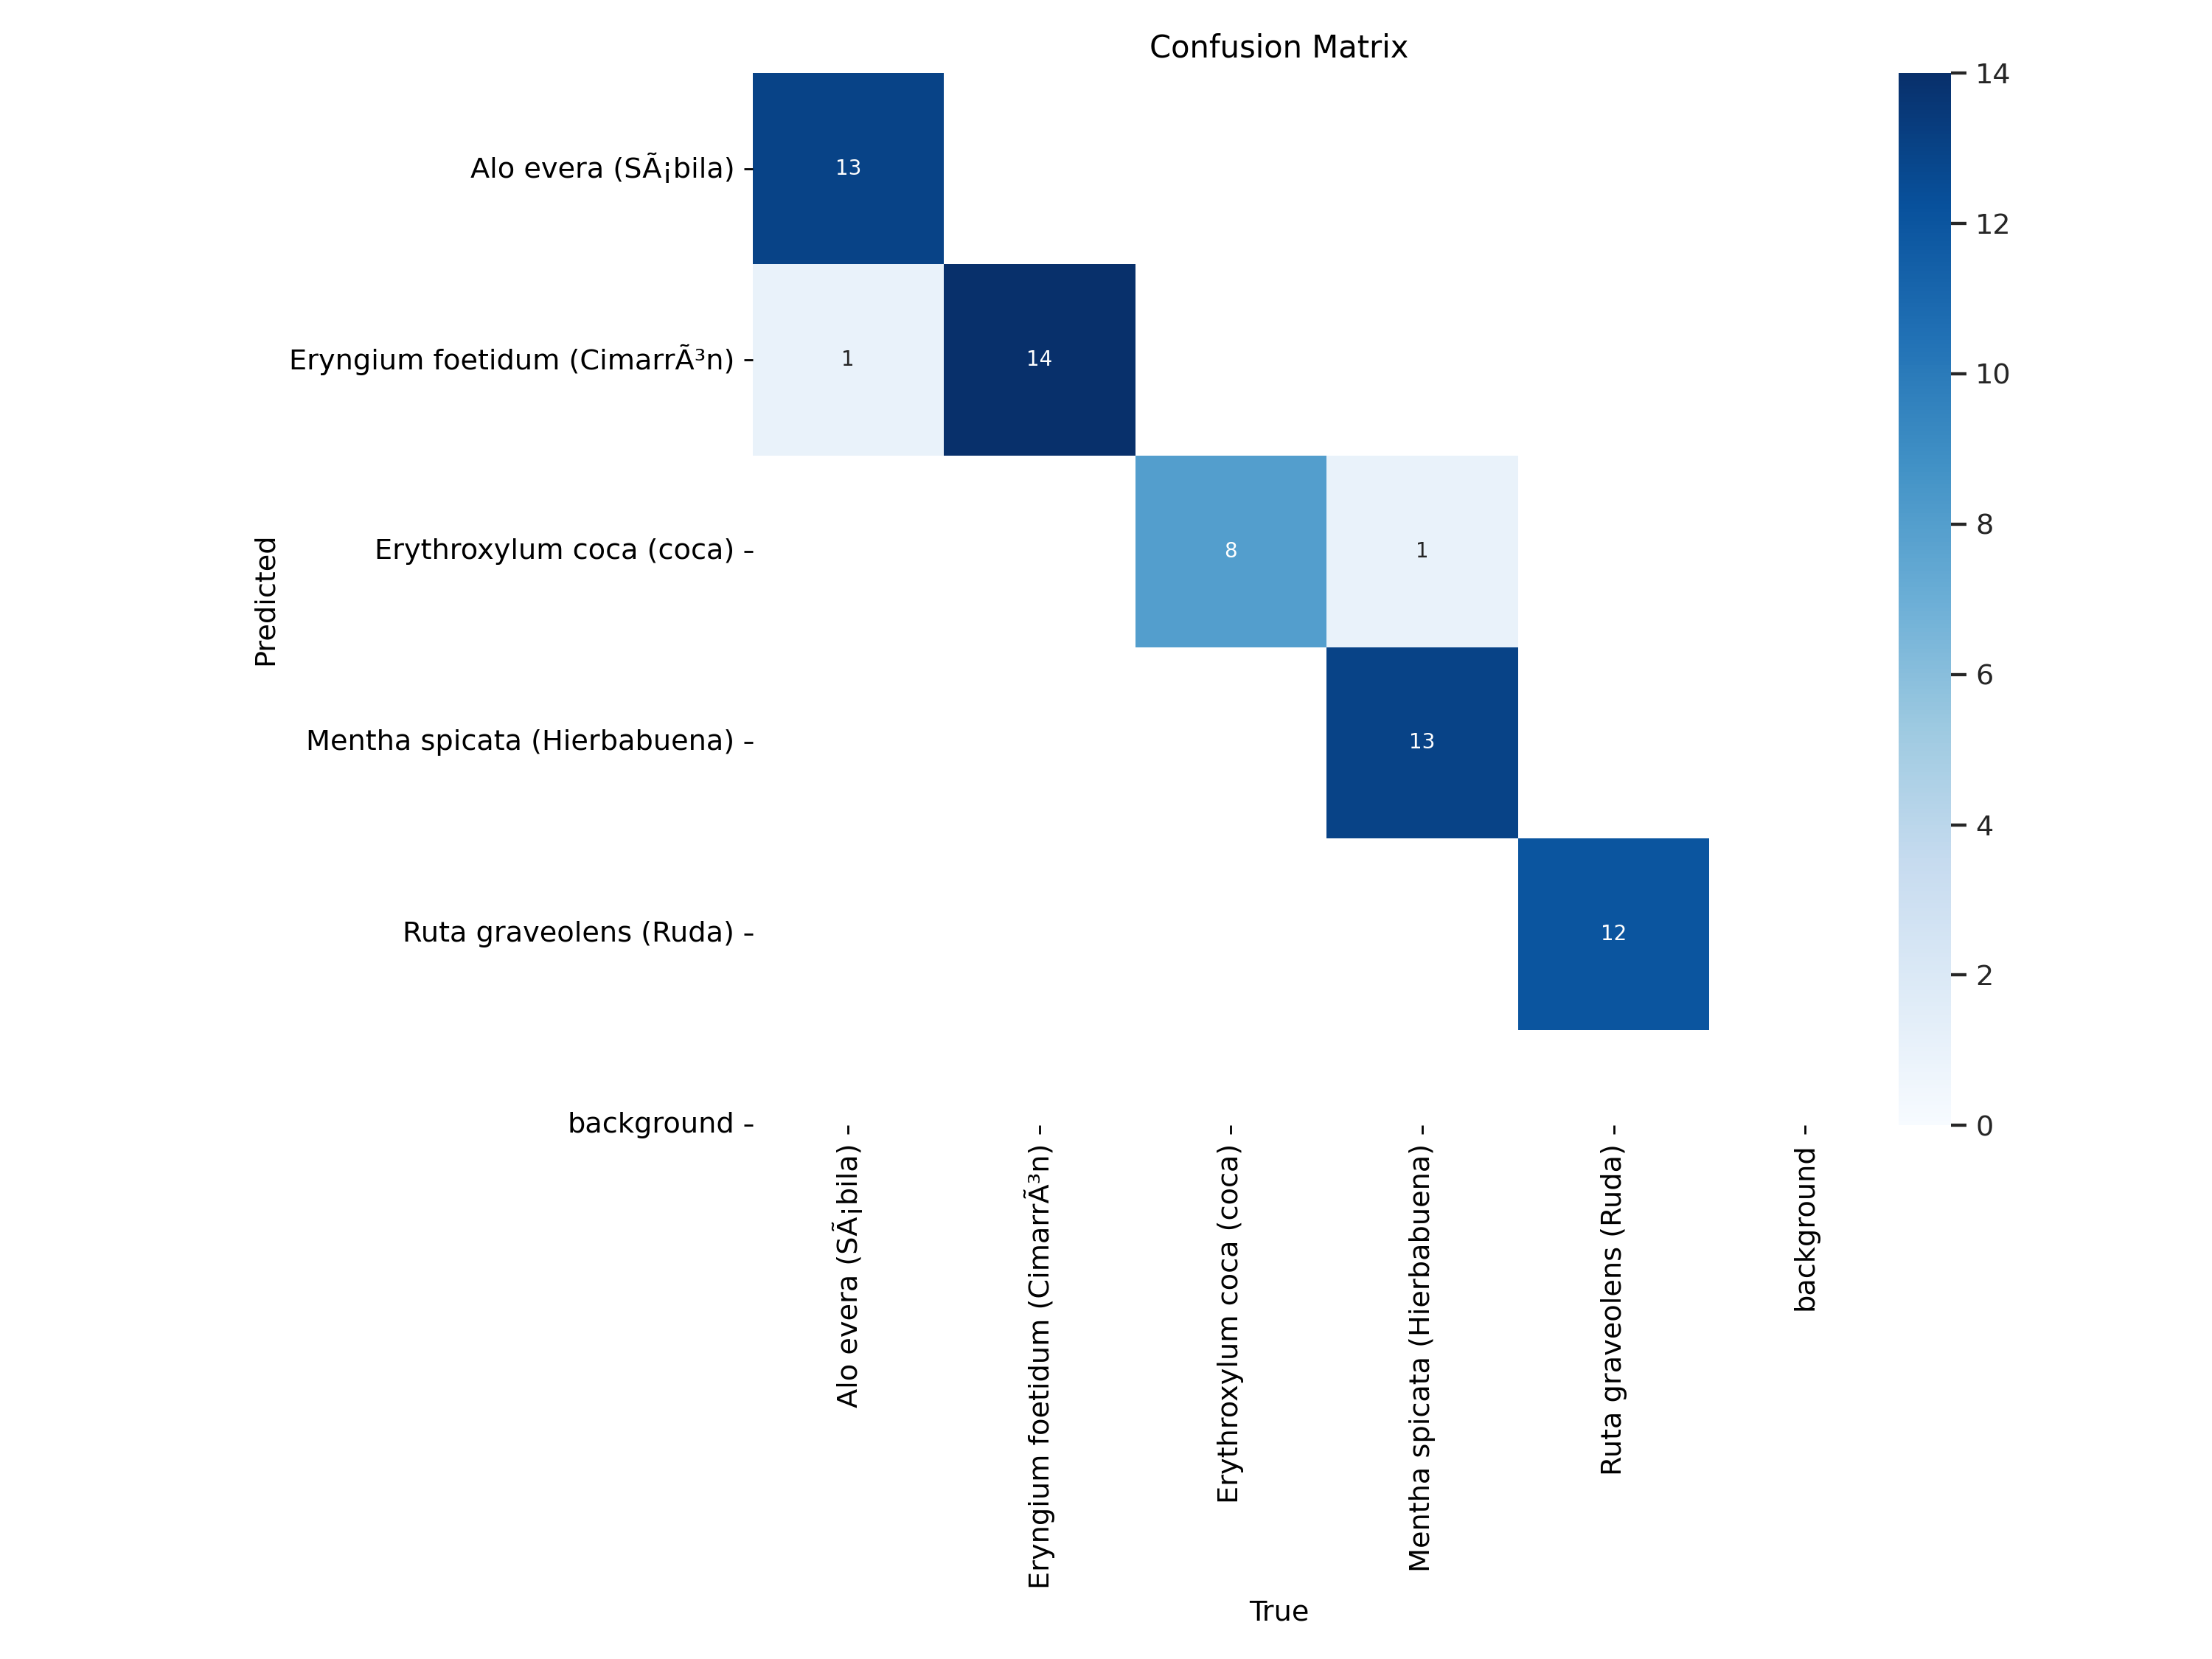

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train2/confusion_matrix.png', width=600)


/content


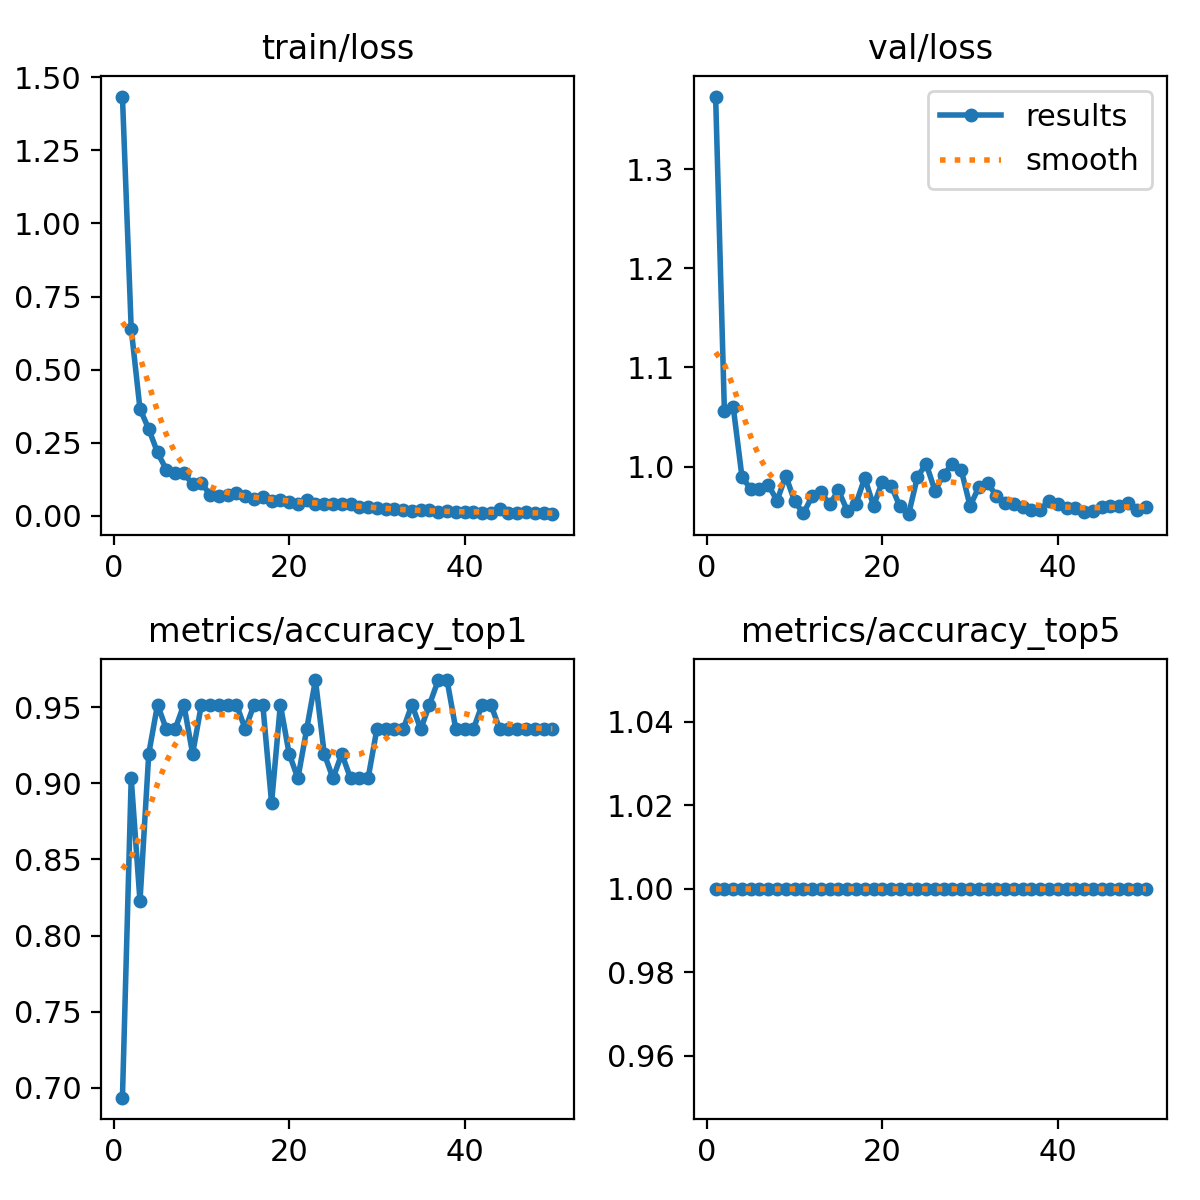

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train2/results.png', width=600)


/content


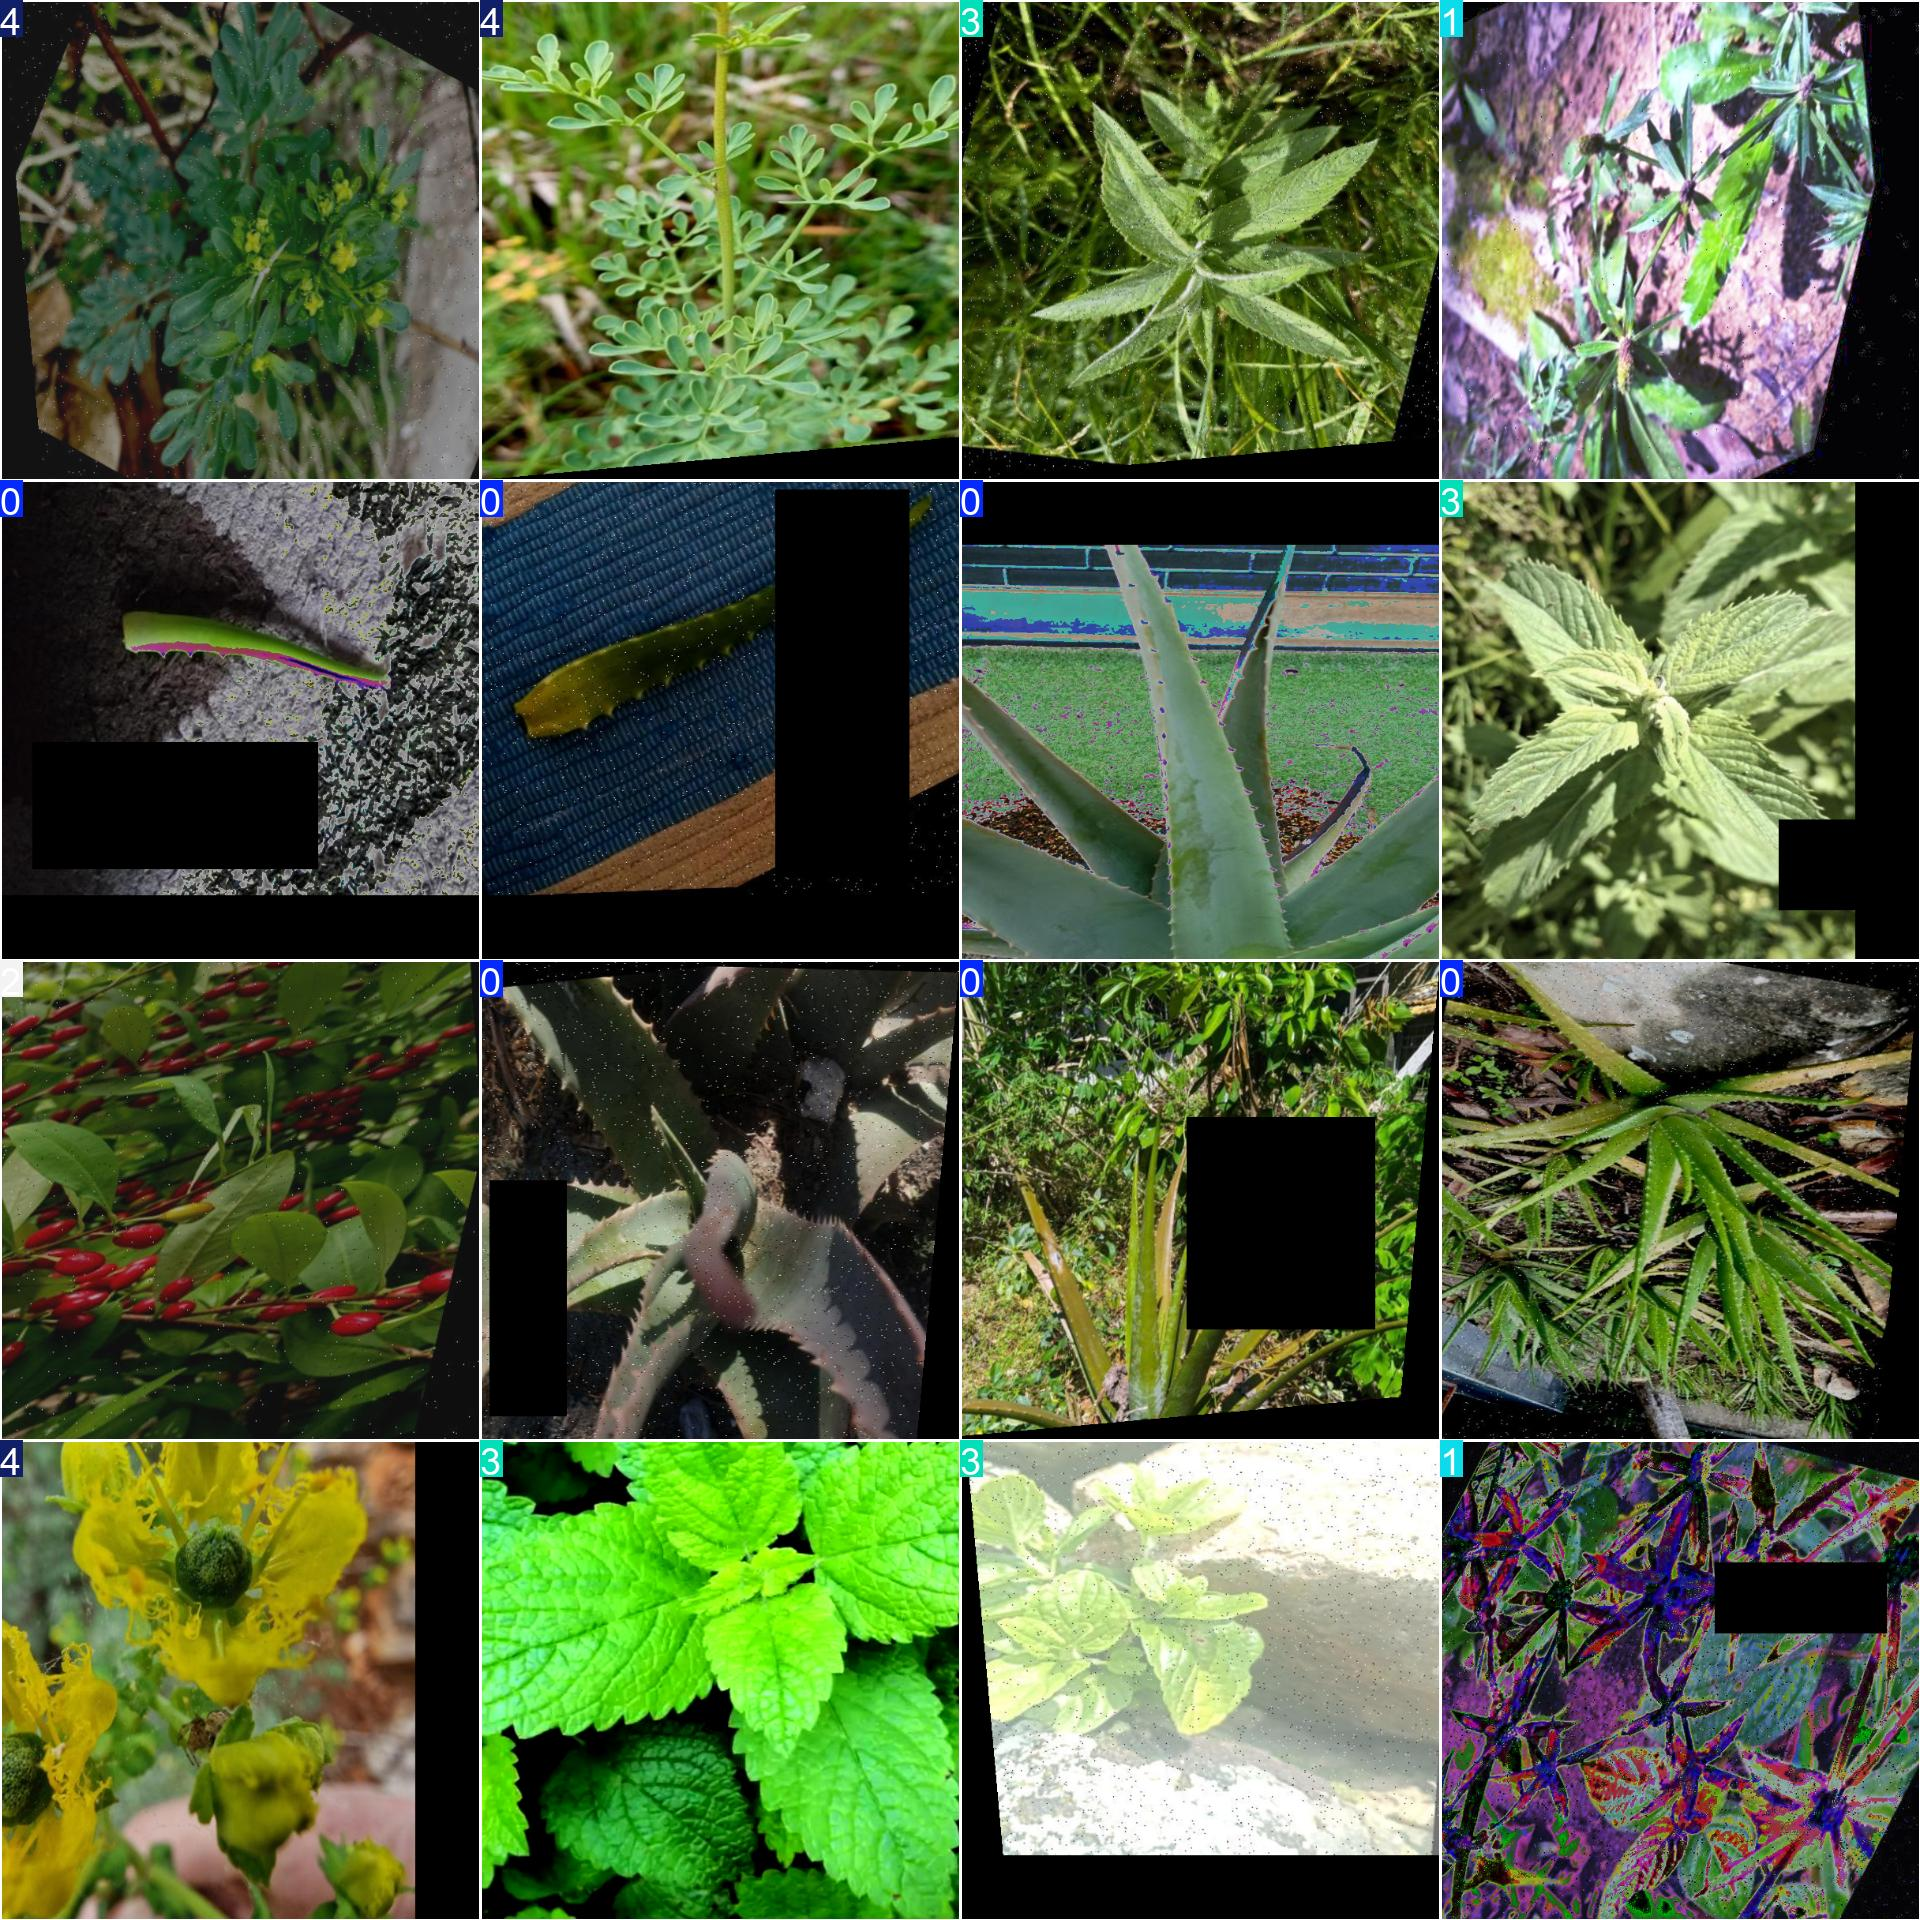

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train2/train_batch3240.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

##Probando el modelo imagenes de tes


In [ ]:
model = YOLO("runs/classify/train2/weights/best.pt")

# Asigna los nombres de clase en el orden correcto (según carpetas de tu dataset)
model.model.names = ['Sabila', 'Cimarron', 'Coca', 'Menta', 'Ruda']  # ejemplo

# Ahora los resultados mostrarán nombres reales
results = model("/content/datasets/Green_Machine-1/valid/Mentha spicata (Hierbabuena)/img_48_jpg.rf.18371fc13331a7d4827270264b282a59.jpg")
r=results[0]
r.verbose()
r.show()


image 1/1 /content/datasets/Green_Machine-1/valid/Mentha spicata (Hierbabuena)/img_48_jpg.rf.18371fc13331a7d4827270264b282a59.jpg: 608x608 Menta 1.00, Coca 0.00, Cimarron 0.00, Sabila 0.00, Ruda 0.00, 7.3ms
Speed: 12.3ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 608, 608)


##Probando el modelo con camara


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io
import cv2
import numpy as np

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO



In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Tomar Foto';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Espera a que se presione el botón
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


🎥 Abriendo cámara...


<IPython.core.display.Javascript object>

📸 Foto guardada en: photo.jpg

image 1/1 /content/photo.jpg: 608x608 Sabila 0.50, Cimarron 0.44, Menta 0.06, Coca 0.00, Ruda 0.00, 7.4ms
Speed: 22.5ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 608, 608)

🌿 Clase predicha: Sabila (0.50)


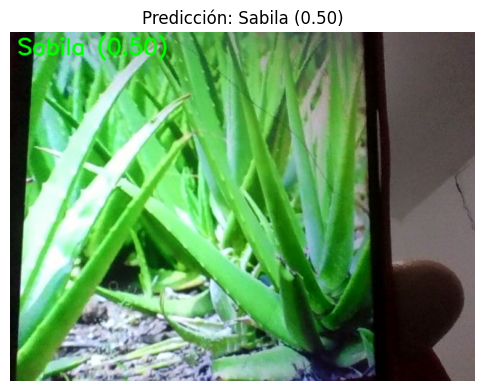

In [ ]:
model = YOLO("runs/classify/train2/weights/best.pt")
model.model.names = ['Sabila', 'Cimarron', 'Coca', 'Menta', 'Ruda']  # Ajusta según tus clases

# Paso 4: Función completa para tomar foto, clasificarla y mostrar resultado
def clasificar_con_camara():
    print("🎥 Abriendo cámara...")
    photo_path = take_photo()
    print(f"📸 Foto guardada en: {photo_path}")

    # Predicción
    results = model(photo_path)
    r = results[0]

    # Obtener la clase con mayor probabilidad
    top_idx = r.probs.top1
    label = model.model.names[top_idx]
    conf = r.probs.data[top_idx].item()

    # Mostrar resultado
    print(f"\n🌿 Clase predicha: {label} ({conf:.2f})")

    # Visualizar imagen con etiqueta
    image = cv2.imread(photo_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.putText(image, f'{label} ({conf:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 255, 0), 2, cv2.LINE_AA)

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicción: {label} ({conf:.2f})")
    plt.show()

# Paso 5: Ejecutar todo
clasificar_con_camara()